In [1]:
NAME = 'Part-3-A'

____________

In [2]:
import numpy as np
import random
from math import sqrt
import nepzeb

In [3]:
n = 1000

mu = 4 #Rate

t = 0

ni = n//2

T = 30 

ar = sorted(np.random.exponential(1/mu,10000))[2000]
br = sorted(np.random.exponential(1/mu,10000))[8000]

pr = 0.9

#matrix variable
l = 1000
c = 4

ns = ni
nh = n - ns
nd = 0
nu = 0
nr = 0
nu = 0

____________

<div dir=rtl>
    هر کدام از افراد را به تصادف در نقطه‌ای ثابت در ماتریس جا می‌دهیم.
    موقعیت هر کس را به صورت
    (x,y)
    تعریف می‌کنیم.
   
</div>

In [4]:
def random_per():
    N = []
    while len(N) < n:
        zz = (random.randint(1,l), random.randint(1,l))
        if not(zz) in N:
            N.append(zz)
    return(N)
N = random_per()

In [5]:
N[:5]

[(725, 490), (374, 270), (97, 725), (68, 616), (676, 947)]

_______________

<div dir=rtl>
    توابع زیر توابع معرفی شده در مثال سه هستند که به صورت عمومی برای نقطه داده شده و لیستی که به آن داده می‌شود با کسانی که فاصله اقلیدسی کمتر مساوی c
    دارند، نرخ را محاسبه می‌کند.
    لازم به ذکر است نرم‌های دیگر مانند فاصله منهتن هم مناسب مدل هستند.
</div>

In [6]:
def f_1(node,X):
    u = 0
    for each_cell in range(len(X)):
        (a, b) = X[each_cell]
        dis = sqrt((node[0] - a)** 2 + (node[1] -b)**2)
        if  dis <= c:
            #f(i,j)= mu * \delta_{d(i,j)} 
            u += mu
    return(u)
    

In [7]:
def f_2(node,X):
    u = 0
    for each_cell in range(len(X)):
        (a, b) = X[each_cell]
        dis = sqrt((node[0] - a)** 2 + (node[1] -b)**2)
        if  dis <= c:
            #f(i,j)= mu /(1 + d(i,j)) * \delta_{d(i,j)} 
            u += mu / 1+ dis
    return(u)

_____


<div dir=rtl>
    لیستی به تعداد نفرات جامعه ایجاد می‌کنیم که به تصادف به تعداد افراد سالم و مریض وضعیت آن‌ها مشخص شده است.
</div>


In [8]:
society = ['sick' for i in range(ns)] + ['healthy' for j in range(nh)]
random.shuffle(society)


<div dir=rtl>
    لیستی به تعداد افراد جامعه صفر تولید می‌کنیم، اگر فردی یکبار بهبود پیدا کرد خانه متعلق به اون به ۱ تغییر می‌کند.
</div>


In [9]:
recoverd = np.zeros(n)


<div dir=rtl>
    لیست خالی برای نگهداری زمان پایان هر فردی که در نقاهت به سر می‌برد ایجاد می‌کنیم.
</div>


In [10]:
tu_list = []

__________

<div dir=rtl>
    دو تابع اصلی در این شبیه سازی که فرآیند اصلی را انجام می‌دهند
    .
    با توجه به سوال سه که سیگما را برای افراد مریض و در دوران نقاهت تعریف می‌کند.
    این تابع برای هر فرد با توجه به موقعیتی که دارد، یعنی در کدام مرکز خرید و یا کدام محل کار و یا در ماتریس اصلی لیستی از همسایه‌های
    مریض و یا در دوران نقاهت می‌دهد
</div>

In [11]:
def NS():
    
    NS = []
    
    for each_person in range(n):
        if society[each_person] == 'sick':
            NS.append(N[each_person])
        
            
            
    return(list(NS))

________

<div dir=rtl>
   زمان وقوع اولین مریضی و اینکه کدام فرد را تولید می‌کنیم، در صورتی که زمان قبل از بهبود فردی دیگر رخ دهد، تابع اصلی آن را اجرا می کنیم.
    در اینجا MU از
    جنس میانگین است،
    ولی با عکس آن یعنی نرخ زمان‌ها را تولید می‌کنیم.
    
</div>


In [12]:
#return time and index of person who get sick

def NewCase_occur():
    
    fall_ill_chance = []
    for every_person in range(len(society)):
        
        
        if (society[every_person] == 'healthy'):
            
            #compute rate of Falling ill
            MU = f_1(N[every_person], NS())
            
            
            
            fall_ill_chance.append(np.random.exponential(1/MU) if MU else float('inf'))

        #sick or dead or recoverd
        else:
            fall_ill_chance.append(float('inf'))

    return(min(fall_ill_chance),fall_ill_chance.index(min(fall_ill_chance)))


In [13]:
#how the "inline if" work
print(np.random.exponential(1/0) if 0 else float('inf'))

inf


In [14]:
def NewCase(tt, index):
    global t
    global ns
    global nh
    
    t += tt
    ns += 1
    nh -= 1
    
    society[index] = 'sick'


___________


<div dir=rtl>
    اتفاق دوم هم همانند اول ایجاد می‌کنیم، در صورتی که زمان رخداد کمتر از اتفاق اول باشد،
    تابع اصلی اتفاق اول را اجرا می‌کنیم.
    با توجه به شرط سوال اول که امکان مریض شدن  دوباره افراد ممکن/ناممکن است.
    تابع اصلی اتفاق دوم را به دو صورت نوشته شده است. در صورت تمایل از هرکدام می‌شود، استفاده کرد.
    
</div>

In [15]:
#getting better or dead
def tr_occur():
    
    v = []
    for ill in range(len(society)):
        if society[ill] == 'sick':
            v.append(np.random.uniform(ar,br))

        else:
            v.append(float('inf'))
    return(min(v),v.index(min(v)))

In [16]:
def tr_a(tt,index):
    
    global nd
    global nh
    global nr
    global nu
    global ns
    global t
    
    t += tt
    
    if random.random() < pr:

        nh += 1
        nr += 1
        nu += 1
        ns -= 1
        
        tu_list.append( ((t+(np.random.uniform(0.1,1))),N[index]) )

        society[index] = 'recoverd'
        recoverd[index] = 1
    else:
        
        nd += 1
        ns -= 1
        society[index] = 'dead'

In [17]:
def tr(tt,index):
    
    global nd
    global nh
    global nr
    global nu
    global ns
    global t
    
    t += tt
    
    if random.random() < pr:
        
        nh += 1
        nr += 1
        nu += 1
        ns -= 1
        
        tu_list.append( ((t+(np.random.uniform(0.1,1))),N[index]) )

        society[index] = 'healthy'
        recoverd[index] = 1
    else:
        
        nd += 1
        ns -= 1
        society[index] = 'dead'

________

In [18]:
fileName = NAME + '-n:{},ni:{},mu:{},ar:{},br:{},pr:{}'.format(n,ni,mu,ar,br,pr)

In [19]:
f = open('{}.csv'.format(fileName), 'w')
f.write('Event,Time,Healthy People,Ill People,Recoverd people,RIP,\n')

58

______________

In [20]:
while (t < T):
    
    
    #check if one or more people's convalescence time have been over
    tu_list.sort()
    if (len(tu_list) > 0):
        if (tu_list[0][0] <= t):
            count = 0
            for i in range(len(tu_list)):
                if tu_list[i][0] <= t:
                    count += 1
            nu -= count
            tu_list = tu_list[count:]
            

    X = NewCase_occur()
    Y = tr_occur()
    
    #check if both are inf then Break
    if X[0] == Y[0] == float('inf'):
        break
    
    
    
    if X[0] <= Y[0]:
        NewCase(X[0],X[1])
        f.write('[sick],{},{},{},{},{}, \n'.format(t,nh,ns,int(sum(recoverd)),nd))
        
    if Y[0] < X[0]:
        tr(Y[0], Y[1])
        f.write('[heal/dead],{},{},{},{},{}, \n'.format(t,nh,ns,int(sum(recoverd)),nd))
    
f.close()

In [21]:
t

30.730047912203002

In [22]:
nh + nd + ns

1000

In [23]:
nh,nd,ns

(13, 2, 985)

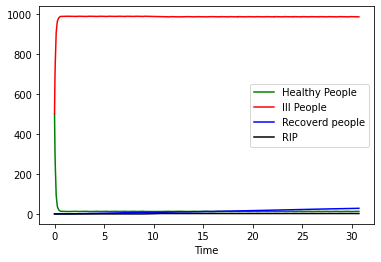

In [24]:
nepzeb.plotter('{}.csv'.format(fileName))